In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas_profiling import ProfileReport


In [41]:
%matplotlib inline

# Data Exploration


Reading the .CSV file, verifyng data types, number of rows and columns and cheking for null values.

In [42]:
df = pd.read_csv('/home/joao_victor/ifood_analysis/ml_project1_data.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [43]:
profile = ProfileReport(df, title="Pandas Profiling Report", minimal = True)

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Checking data type


In [44]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [45]:
df.shape

(2240, 29)

In [46]:
# #checking for 'null' values
# df.isnull().sum().sort_values(ascending=False) 

In [47]:
# % of rows missing in each column
# for column in df.columns:
#     percentage = df[column].isnull().mean()
#     print(f'{column}: {round(percentage*100, 2)}%')

Replacing Income null values with the mean, for keeping more data intact 

In [48]:
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [49]:
#checking for 'null' values
df.isnull().sum().sort_values(ascending=False) 

ID                     0
NumDealsPurchases      0
Z_Revenue              0
Z_CostContact          0
Complain               0
AcceptedCmp2           0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
MntGoldProds           0
Year_Birth             0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Response               0
dtype: int64

Checking the values of categorical variables


In [50]:
df['Marital_Status'].unique()
df.drop(df[df.Marital_Status == 'YOLO'].index, inplace=True)
df.drop(df[df.Marital_Status == 'Alone'].index, inplace=True)
df.drop(df[df.Marital_Status == 'Absurd'].index, inplace=True)

In [51]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

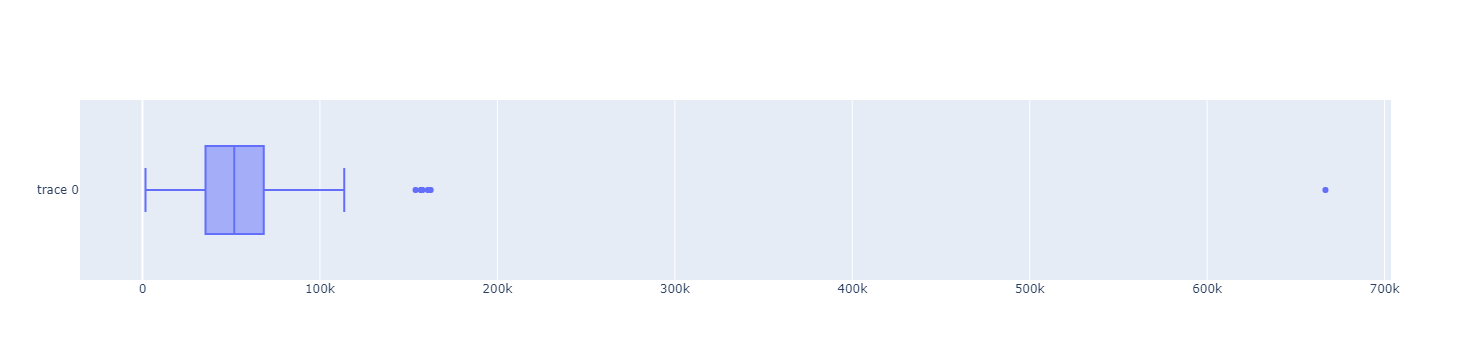

In [52]:
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import nbformat
fig = go.Figure()
fig.add_box(x=df['Income'], text=df['Income'])
iplot(fig)

In [53]:
df['Income'].describe()

count      2233.000000
mean      52244.013002
std       25062.634030
min        1730.000000
25%       35523.000000
50%       51766.000000
75%       68316.000000
max      666666.000000
Name: Income, dtype: float64

In [54]:

df_columns_str = list(df.select_dtypes(include = 'object').columns.values)
df_columns_int = list(df.select_dtypes(include = ['int64', 'float64']).columns.values) 
columns = list(df.columns.values)
for i in df_columns_str:
    df[i].str.lower()
    df[i].str.strip()
    df[i].replace('[^\w\s]', '', regex=True, inplace=True)

In [55]:
df.drop('Z_CostContact', axis = 1, inplace = True)
df.drop('Z_Revenue', axis = 1, inplace = True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,20120904,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,20140308,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,20130821,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,20140210,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,20140119,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,20130613,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,20140610,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,20140125,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,20140124,8,428,...,5,10,3,0,0,0,0,0,0,0


In [56]:
# class count
class_count_0, class_count_1 = df['Response'].value_counts()

# Separate class
class_0 = df[df['Response'] == 0]
class_1 = df[df['Response'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1902, 27)
class 1: (331, 27)


Ploting correlation graph. Looking for high correlation features

<AxesSubplot:>

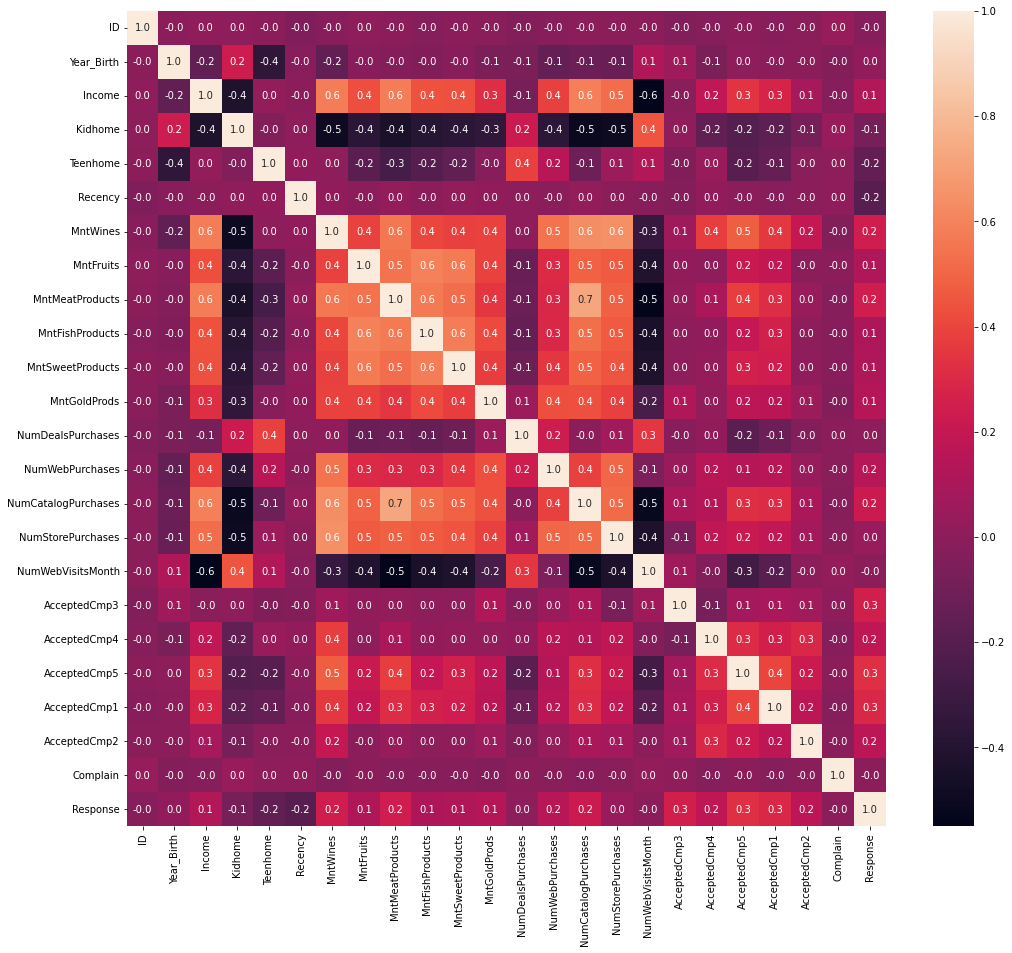

In [57]:

matriz_correlacao = df.corr()
plt.figure(figsize = (17, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

After analyzing the outliers, we can see there is a lot of then and if I removed them all, there would be a great data loss, so I decided to remove only the strong outliers.

The outliers are defined as: $$ Q1 - 1.5(IQR) > outlier > Q3 + 1.5(IQR) $$
And the Strong outleirs are the same but multiplied by 3: $$ Q1 - 3.0(IQR) > outlier > Q3 + 3.0(IQR) $$

Income


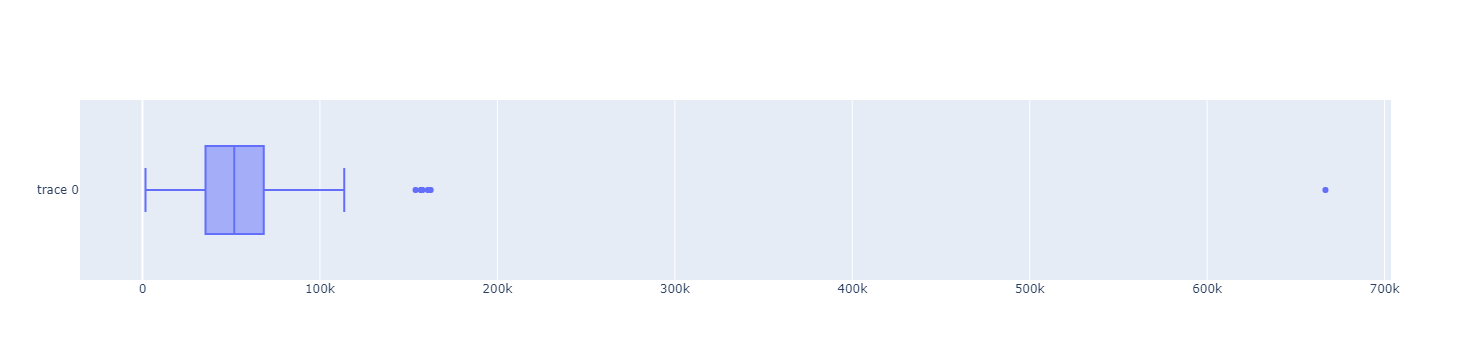

Highest allowed 127431
MntWines


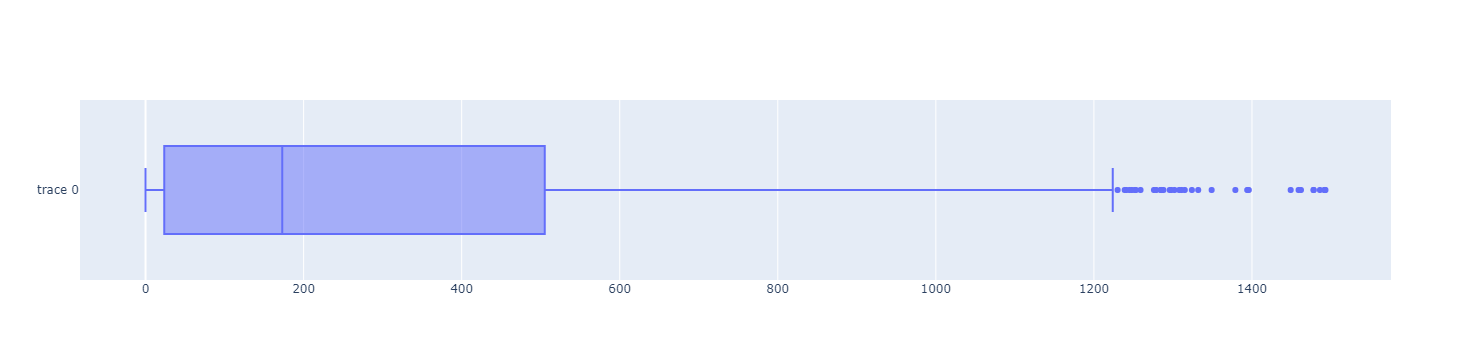

Highest allowed 1314
MntFruits


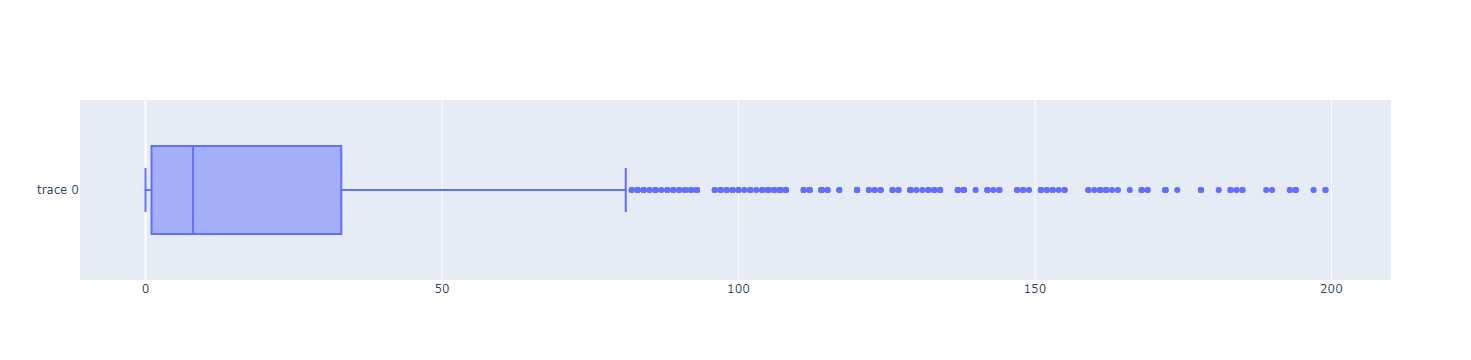

Highest allowed 145
MntMeatProducts


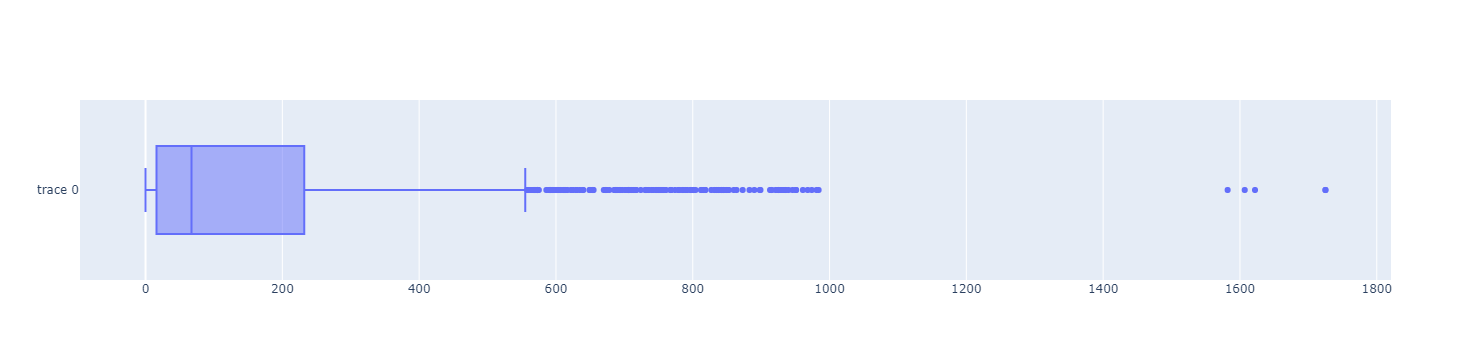

Highest allowed 844
MntFishProducts


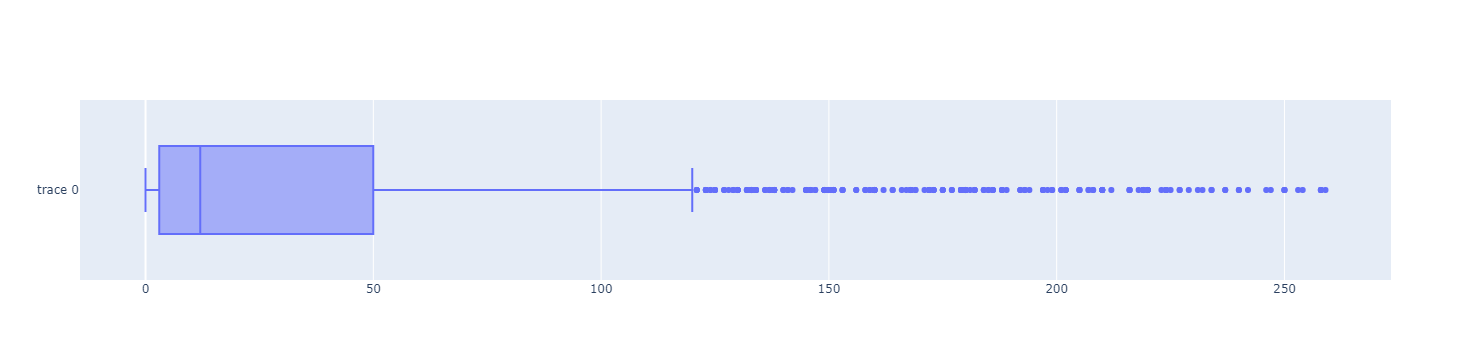

Highest allowed 200
MntSweetProducts


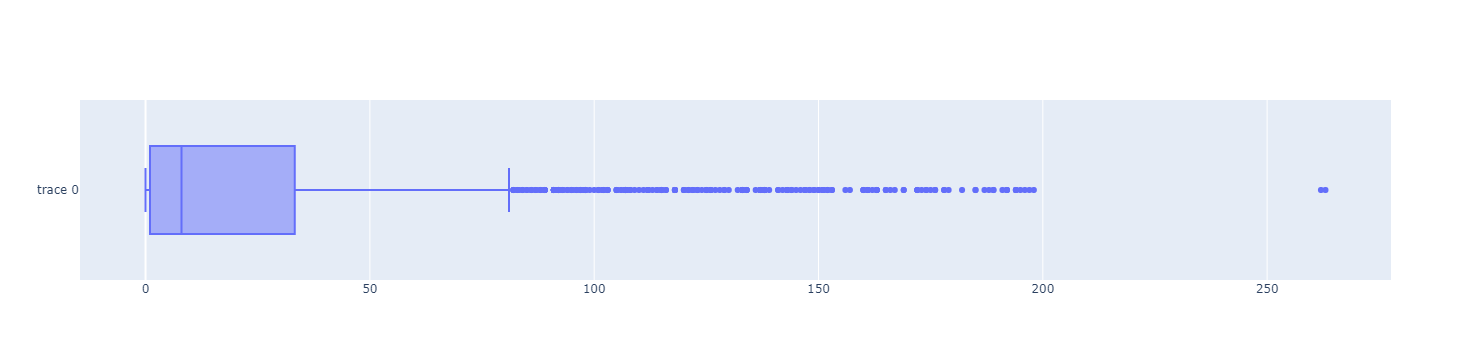

Highest allowed 151
MntGoldProds


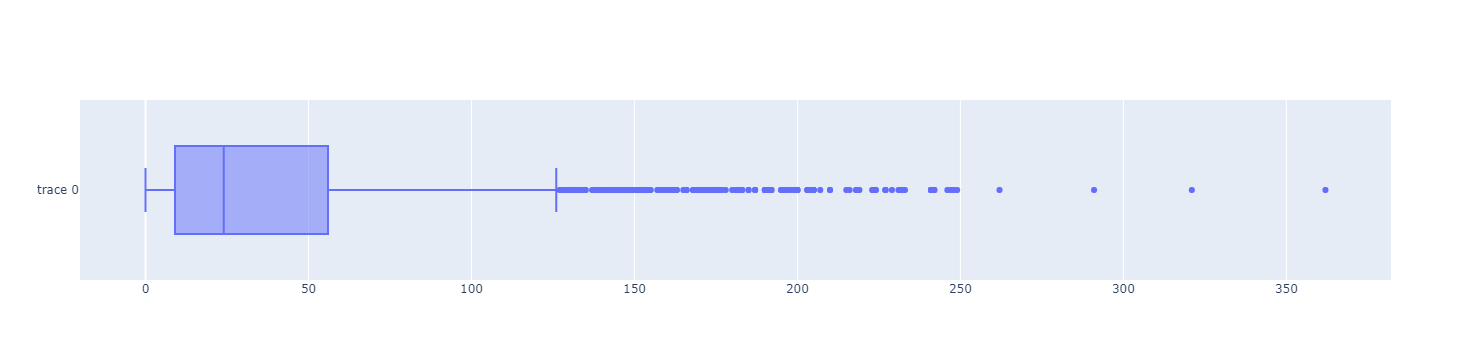

Highest allowed 199
NumDealsPurchases


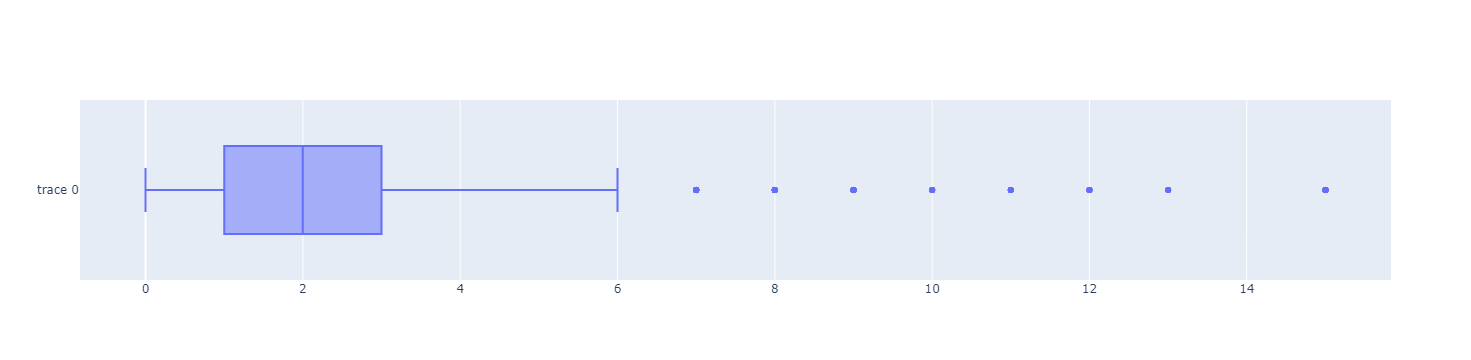

Highest allowed 8
NumWebPurchases


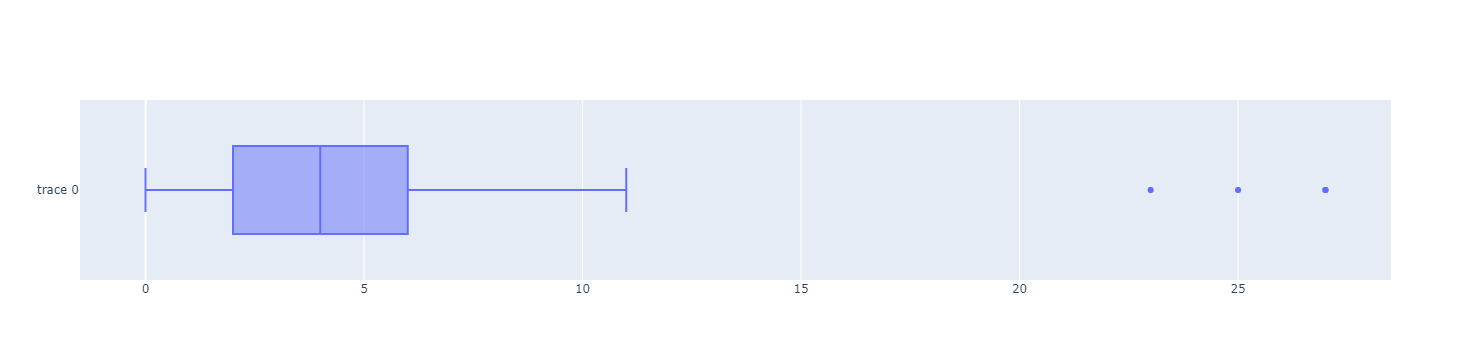

Highest allowed 12
NumCatalogPurchases


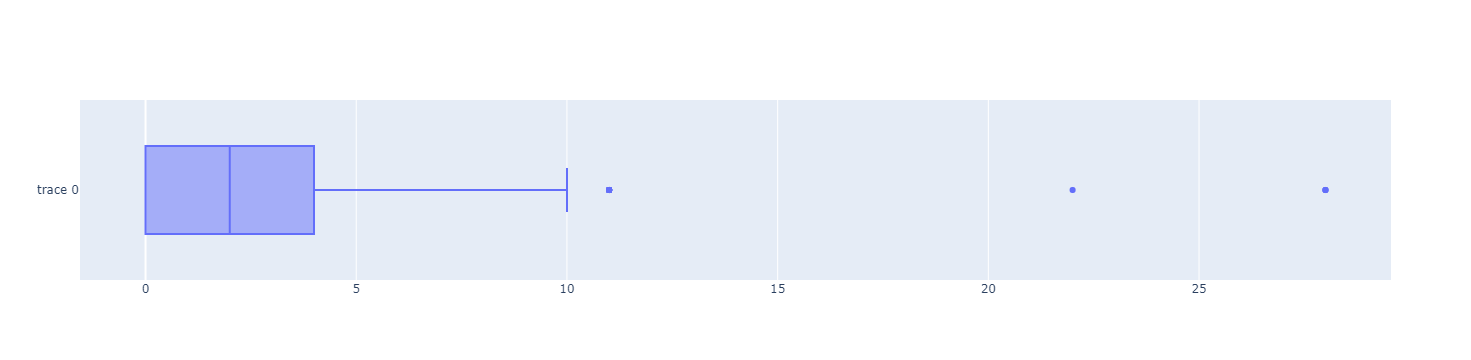

Highest allowed 11
NumStorePurchases


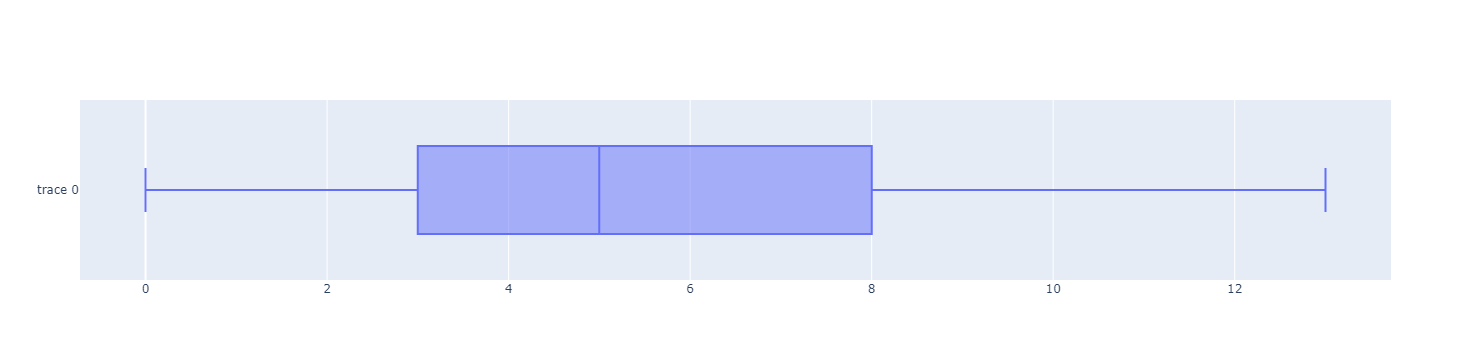

Highest allowed 15
NumWebVisitsMonth


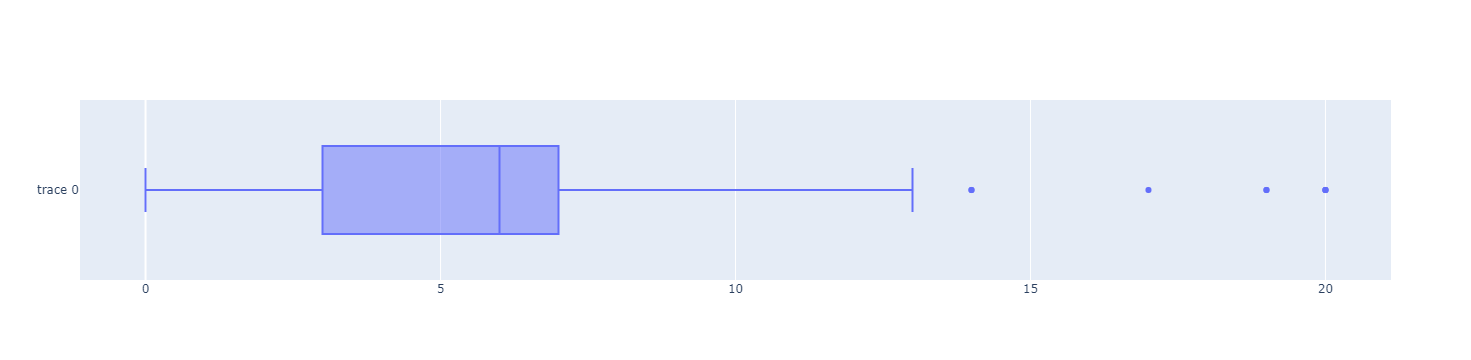

Highest allowed 12


In [58]:
# Looking for outliers
out_col = ['Income', 
           'MntWines',
           'MntFruits',
           'MntMeatProducts',
           'MntFishProducts',
           'MntSweetProducts',
           'MntGoldProds',
           'NumDealsPurchases',
           'NumWebPurchases',
           'NumCatalogPurchases',
           'NumStorePurchases',
           'NumWebVisitsMonth']

"""
for i in out_col:
    warnings.filterwarnings('ignore')
    print(i)
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    sns.distplot(df[i])
    plt.show()
    print("Highest allowed", int(df[i].mean() + 3*df[i].std()))
    """

for i in out_col:
    print(i)
    fig = go.Figure()
    fig.add_box(x=df[i], text=df[i])
    iplot(fig)
    print("Highest allowed", int(df[i].mean() + 3*df[i].std()))
    

# warnings.filterwarnings('ignore')
# print('Income')
# plt.figure(figsize=(20,8))
# plt.subplot(1,2,1)
# sns.distplot(df['Income'])
# plt.show()

# print("Highest allowed", int(df['Income'].mean() + 3*df['Income'].std()))

# print('MntWines')
# plt.figure(figsize=(20,8))
# plt.subplot(1,2,1)
# sns.distplot(df['MntWines'])
# plt.show()

# print("Highest allowed", int(df['MntWines'].mean() + 3*df['MntWines'].std()))

# print('MntFruits')
# plt.figure(figsize=(20,8))
# plt.subplot(1,2,1)
# sns.distplot(df['MntFruits'])
# plt.show()

# print("Highest allowed", int(df['MntFruits'].mean() + 3*df['MntFruits'].std()))
# print('MntMeatProducts')
# plt.figure(figsize=(20,8))
# plt.subplot(1,2,1)
# sns.distplot(df['MntMeatProducts'])
# plt.show()

# print("Highest allowed", int(df['MntMeatProducts'].mean() + 3*df['MntMeatProducts'].std()))

# print('MntFishProducts')
# plt.figure(figsize=(20,8))
# plt.subplot(1,2,1)
# sns.distplot(df['MntFishProducts'])
# plt.show()

# print("Highest allowed", int(df['MntFishProducts'].mean() + 3*df['MntFishProducts'].std()))

# print('MntSweetProducts')
# plt.figure(figsize=(20,8))
# plt.subplot(1,2,1)
# sns.distplot(df['MntSweetProducts'])
# plt.show()

# print("Highest allowed", int(df['MntSweetProducts'].mean() + 3*df['MntSweetProducts'].std()))
# print('MntGoldProds')
# plt.figure(figsize=(20,8))
# plt.subplot(1,2,1)
# sns.distplot(df['MntGoldProds'])
# plt.show()

# print("Highest allowed", int(df['MntGoldProds'].mean() + 3*df['MntGoldProds'].std()))

# print('NumDealsPurchases')
# plt.figure(figsize=(20,8))
# plt.subplot(1,2,1)
# sns.distplot(df['NumDealsPurchases'])
# plt.show()

# print("Highest allowed", int(df['NumDealsPurchases'].mean() + 3*df['NumDealsPurchases'].std()))

# print('NumWebPurchases')
# plt.figure(figsize=(20,8))
# plt.subplot(1,2,1)
# sns.distplot(df['NumWebPurchases'])
# plt.show()

# print("Highest allowed", int(df['NumWebPurchases'].mean() + 3*df['NumWebPurchases'].std()))
# print('NumCatalogPurchases')
# plt.figure(figsize=(20,8))
# plt.subplot(1,2,1)
# sns.distplot(df['NumCatalogPurchases'])
# plt.show()

# print("Highest allowed", int(df['NumCatalogPurchases'].mean() + 3*df['NumCatalogPurchases'].std()))

# print('NumStorePurchases')
# plt.figure(figsize=(20,8))
# plt.subplot(1,2,1)
# sns.distplot(df['NumStorePurchases'])
# plt.show()

# print("Highest allowed", int(df['NumStorePurchases'].mean() + 3*df['NumStorePurchases'].std()))

# print('NumWebVisitsMonth')
# plt.figure(figsize=(20,8))
# plt.subplot(1,2,1)
# sns.distplot(df['NumWebVisitsMonth'])
# plt.show()

# print("Highest allowed", int(df['NumWebVisitsMonth'].mean() + 3*df['NumWebVisitsMonth'].std()))


In [59]:

for i in out_col:
    df.drop(df[df[i]>(int(df[i].mean() + 3*df[i].std()))].index, inplace=True)
    

# df.drop(df[df.MntWines>1313].index, inplace=True)

# df.drop(df[df.MntFruits>145].index, inplace=True)

# df.drop(df[df.MntMeatProducts>823].index, inplace=True)

# df.drop(df[df.MntFishProducts>201].index, inplace=True)

# df.drop(df[df.MntSweetProducts>151].index, inplace=True)

# df.drop(df[df.MntGoldProds>200].index, inplace=True)

# df.drop(df[df.NumDealsPurchases>8].index, inplace=True)

# df.drop(df[df.NumWebPurchases>12].index, inplace=True)

# df.drop(df[df.NumCatalogPurchases>11].index, inplace=True)

# df.drop(df[df.NumStorePurchases>15].index, inplace=True)

# df.drop(df[df.NumWebVisitsMonth>12].index, inplace=True)


In [60]:
for i in out_col:
    print(i)
    print("Highest allowed", int(df[i].mean() + 3*df[i].std()))

Income
Highest allowed 104271
MntWines
Highest allowed 1186
MntFruits
Highest allowed 101
MntMeatProducts
Highest allowed 588
MntFishProducts
Highest allowed 139
MntSweetProducts
Highest allowed 98
MntGoldProds
Highest allowed 148
NumDealsPurchases
Highest allowed 7
NumWebPurchases
Highest allowed 11
NumCatalogPurchases
Highest allowed 8
NumStorePurchases
Highest allowed 14
NumWebVisitsMonth
Highest allowed 12


In [61]:
# class count
class_count_0, class_count_1 = df['Response'].value_counts()

# Separate class
class_0 = df[df['Response'] == 0]
class_1 = df[df['Response'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1646, 27)
class 1: (216, 27)


# Machine Learning Models

Selecting features

In [62]:
y = df['Response']
features = ['Year_Birth',
  'Education',
  'Marital_Status',
  'Income',
  'Kidhome',
  'Teenhome',
  'Recency',
  'MntWines',
  'MntFruits',
  'MntMeatProducts',
  'MntFishProducts',
  'MntSweetProducts',
  'MntGoldProds',
  'NumDealsPurchases',
  'NumWebPurchases',
  'NumCatalogPurchases',
  'NumStorePurchases',
  'NumWebVisitsMonth',
  'AcceptedCmp3',
  'AcceptedCmp4',
  'AcceptedCmp5',
  'AcceptedCmp1',
  'AcceptedCmp2',
  'Complain']
df = pd.get_dummies(df[features])

from sklearn import metrics
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.25, shuffle=True
)

In [63]:
print(X_train)

      Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
707         1951  43185.0        0         1       88       537          6   
1881        1969  30396.0        1         0       22        15          0   
137         1959  33762.0        2         1       61        53          1   
784         1972  31590.0        1         0       40         6          2   
1483        1980  19107.0        1         0       49         2          4   
...          ...      ...      ...       ...      ...       ...        ...   
1155        1963  23091.0        1         1       98        35          0   
1811        1963  46757.0        0         1       71       777         30   
859         1989  85710.0        0         0        5       600         20   
1620        1965  51717.0        0         1       55        98          1   
344         1973  27190.0        1         0       13         1          6   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  

In [64]:
#DecisionTreeClassifier with cross validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

Creating a print result function to determine a precision interval

$$
precision = \frac {Tp}{Fp + Tp}
$$

In [65]:
def imprime_resultados(results):
  media = results['test_precision_macro'].mean()
  desvio_padrao = results['test_precision_macro'].std()
  print("Avarage Precision: %.2f" % (media * 100))
  print("Precision interval: [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

In [77]:
df.to_csv('clean_ml_project.csv', index=False)

In [67]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.8948497854077253

# Training various models for comparison 

##### Using Cross-validation to evaluate the generalizability of a model. The concept of cross-validation technique is partitioning the dataset into subsets, and then using  some of these subsets for training data, with the remaining subsets test data, to validate the model.

The purpose of pipeline function from sklearn library is to ssemble several steps that can be cross-validated together and replicate the training for several subsets 

SVC classifier with all features 

In [68]:
SEED = 403454
np.random.seed(SEED)
cv = KFold(n_splits = 5, shuffle=True)
modelo = SVC()

scaler = StandardScaler()
pipeline = Pipeline([('escalonador', scaler), ('estimador', modelo)])
scoring = ['precision_macro', 'recall_macro']
results = cross_validate(pipeline, df, y, cv = cv, return_train_score=False, scoring = scoring)
imprime_resultados(results)
#print(results)

Avarage Precision: 79.79
Precision interval: [63.07, 96.51]


Using selectkbest to lower df dimension

In [69]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selecionar_kmelhores = SelectKBest(chi2, k = 11)
selecionar_kmelhores.fit(df, y)
train_kbest = selecionar_kmelhores.transform(df)

SVC model with selectkbest


In [70]:
SEED = 403455
np.random.seed(SEED)

cv = KFold(n_splits = 5, shuffle=True)
modelo = SVC()

scaler = StandardScaler()
pipeline = Pipeline([('escalonador', scaler), ('estimador', modelo)])
scoring = ['precision_macro', 'recall_macro']
results = cross_validate(pipeline, train_kbest, y, cv = cv, return_train_score=False, scoring = scoring)
imprime_resultados(results)
#print(results)

Avarage Precision: 82.05
Precision interval: [70.33, 93.77]


In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

LogisticRegression model with selectkbest

In [72]:
SEED = 403455
np.random.seed(SEED)

cv = KFold(n_splits = 5, shuffle=True)

model_LR = LogisticRegression(random_state=0, max_iter = 1000) 


pipeline2 = Pipeline([('LogisticRegression', model_LR)])
scoring = ['precision_macro', 'recall_macro']
results = cross_validate(pipeline2, train_kbest, y, cv = cv, return_train_score=False, scoring = scoring)
imprime_resultados(results)

Avarage Precision: 69.09
Precision interval: [60.83, 77.34]


naive_bayes model with selectkbest

In [73]:
SEED = 403455
np.random.seed(SEED)

cv = KFold(n_splits = 5, shuffle=True)

model_NB = GaussianNB()


pipeline3 = Pipeline([('Naive Bayes', model_NB)])
scoring = ['precision_macro', 'recall_macro']
results = cross_validate(pipeline3, train_kbest, y, cv = cv, return_train_score=False, scoring = scoring)
imprime_resultados(results)

Avarage Precision: 58.13
Precision interval: [49.53, 66.74]


K-Nearest Neighbors model with selectkbest

In [74]:
SEED = 403455
np.random.seed(SEED)

cv = KFold(n_splits = 5, shuffle=True)

model_KNN = KNeighborsClassifier(n_neighbors=3)


pipeline4 = Pipeline([('K-Nearest Neighbors', model_KNN)])
scoring = ['precision_macro', 'recall_macro']
results = cross_validate(pipeline4, train_kbest, y, cv = cv, return_train_score=False, scoring = scoring)
imprime_resultados(results)

Avarage Precision: 60.34
Precision interval: [54.55, 66.14]


In [75]:
SEED = 403455
np.random.seed(SEED)

scoring = ['precision_macro', 'recall_macro']

cv = KFold(n_splits = 5, shuffle=True)

DT_classifier = DecisionTreeClassifier(max_depth=3)

pipeline = Pipeline([('estimator', DT_classifier)])

results = cross_validate(pipeline, df, y, cv = cv, scoring=scoring, return_train_score=True)

imprime_resultados(results)

Avarage Precision: 78.07
Precision interval: [70.31, 85.83]
